In [136]:
import json
import pickle
import pprint
from collections import defaultdict, Counter

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt 

In [83]:
pred_dict = json.load(open('pred_results/SOM-DST_batch40_epoch46_enlr3e5_mx_7838/preds_46.json'))

In [84]:
def create_miss_pred_dict(pred_dict):
    miss_pred_dict = {}
    for k, v in pred_dict.items():
        if v[0] != v[1]:
            miss_pred_dict[k] = v
    return miss_pred_dict

In [85]:
miss_pred_dict = create_miss_pred_dict(pred_dict)

In [129]:
import copy
def create_miss_label_dict(pred_dict):
    """
    miss_gold: 예측해야할 slot을 예측했는데 value가 틀린 경우
    over_pred: 예측하지 말아야할 slot을 예측한 경우
    miss_pred: 예측해야했는데 예측하지 않은 경우
    """
    miss_label_dict = defaultdict(lambda: defaultdict(list))
    total = defaultdict(list)
    for k, v in miss_pred_dict.items():
        p, g = v
        p_sub_g = set(p)-set(g)
        g_sub_p = set(g)-set(p)
        tmp = copy.deepcopy(g_sub_p)
        for e in p_sub_g:
            e_slot = e.rsplit('-', 1)[0]
            for f in g_sub_p:
                f_slot = f.rsplit('-', 1)[0]
                if  e_slot== f_slot:
                    miss_label_dict[k]['miss_gold'].append((e, f))
                    total['miss_gold'].append((e, f))
                    tmp.remove(f)
                else:
                    miss_label_dict[k]['over_pred'].append(e)
                    total['over_pred'].append(e)
        if tmp:
            miss_label_dict[k]['miss_pred'].append(tmp)
            total['miss_pred'].append(f)
    return miss_label_dict, total


In [130]:
miss_label_dict, total = create_miss_label_dict(miss_label_dict)

print(len(total['miss_gold']))
print(len(total['miss_pred']))
print(len(total['over_pred']))

860
159
883


In [180]:
miss_label_dict

defaultdict(<function __main__.create_miss_label_dict.<locals>.<lambda>()>,
            {'calm-smoke-9954:관광_식당_7-6': defaultdict(list,
                         {'miss_gold': [('식당-예약 요일-월요일', '식당-예약 요일-수요일')]}),
             'calm-smoke-9954:관광_식당_7-7': defaultdict(list,
                         {'miss_gold': [('식당-예약 요일-월요일', '식당-예약 요일-수요일')]}),
             'calm-smoke-9954:관광_식당_7-8': defaultdict(list,
                         {'miss_gold': [('식당-예약 요일-월요일', '식당-예약 요일-수요일')]}),
             'summer-voice-4986:식당_관광_9-1': defaultdict(list,
                         {'miss_pred': [{'식당-지역-dontcare'}]}),
             'summer-voice-4986:식당_관광_9-2': defaultdict(list,
                         {'miss_pred': [{'식당-지역-dontcare'}]}),
             'summer-voice-4986:식당_관광_9-3': defaultdict(list,
                         {'miss_pred': [{'식당-지역-dontcare'}]}),
             'summer-voice-4986:식당_관광_9-4': defaultdict(list,
                         {'miss_pred': [{'식당-지역-dontcare'}]}),
             

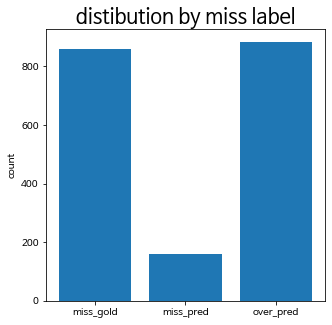

In [214]:
# 시각화
plt.figure(figsize=(5, 5))  # size설정
xtick_label_position = list(range(len(list(total.keys()))))  # x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, list(total.keys()))  # x축 눈금 라벨 출력

plt.bar(xtick_label_position, [len(v) for i, v in total.items()])  # 바차트 출력

plt.title('distibution by miss label', fontsize=20)  # 타이틀 출력
# plt.xlabel('epoch')  # x축 라벨 출력
plt.ylabel('count')  # y축 라벨 출력
plt.show()

### miss_gold 만큼이나 over_pred가 많음

In [ ]:
total['miss_pred']

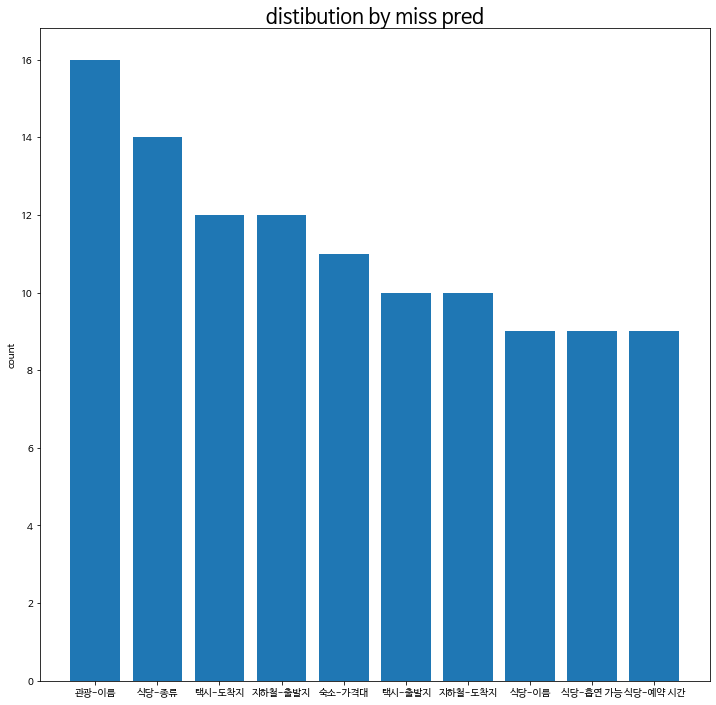

In [302]:
# total['miss_pred'][:10]
slot_count = Counter([e.rsplit('-', 1)[0] for e in total['miss_pred']]).most_common(10)

# 시각화
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(12, 12))  # size설정
xtick_label_position = list(range(len([e[0] for e in slot_count])))  # x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, list([e[0] for e in slot_count]))  # x축 눈금 라벨 출력

plt.bar(xtick_label_position, [e[1] for e in slot_count])  # 바차트 출력

plt.title('distibution by miss pred', fontsize=20)  # 타이틀 출력
# plt.xlabel('epoch')  # x축 라벨 출력
plt.ylabel('count')  # y축 라벨 출력
plt.show()

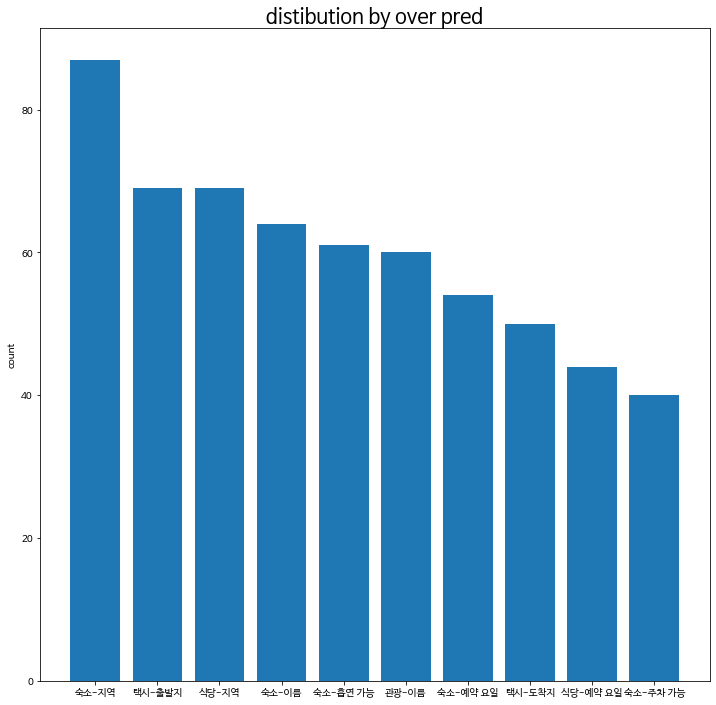

In [173]:
# total['over_pred']

slot_count = Counter([e.rsplit('-', 1)[0] for e in total['over_pred']]).most_common(10)

# 시각화
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(12, 12))  # size설정
xtick_label_position = list(range(len([e[0] for e in slot_count])))  # x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, list([e[0] for e in slot_count]))  # x축 눈금 라벨 출력

plt.bar(xtick_label_position, [e[1] for e in slot_count])  # 바차트 출력

plt.title('distibution by over pred', fontsize=20)  # 타이틀 출력
# plt.xlabel('epoch')  # x축 라벨 출력
plt.ylabel('count')  # y축 라벨 출력
plt.show()

In [178]:
total['miss_gold'][:10]

[('식당-예약 요일-월요일', '식당-예약 요일-수요일'),
 ('식당-예약 요일-월요일', '식당-예약 요일-수요일'),
 ('식당-예약 요일-월요일', '식당-예약 요일-수요일'),
 ('택시-도착 시간-21:30', '택시-도착 시간-21:45'),
 ('식당-이름-뽀의맛집', '식당-이름-뽀식이네 감자탕'),
 ('식당-이름-뽀의맛집', '식당-이름-뽀식이네 감자탕'),
 ('식당-이름-뽀의맛집', '식당-이름-뽀식이네 감자탕'),
 ('식당-이름-뽀의맛집', '식당-이름-뽀식이네 감자탕'),
 ('식당-이름-뽀의맛집', '식당-이름-뽀식이네 감자탕'),
 ('관광-이름-삼성미술관 리움', '관광-이름-예술의전당')]

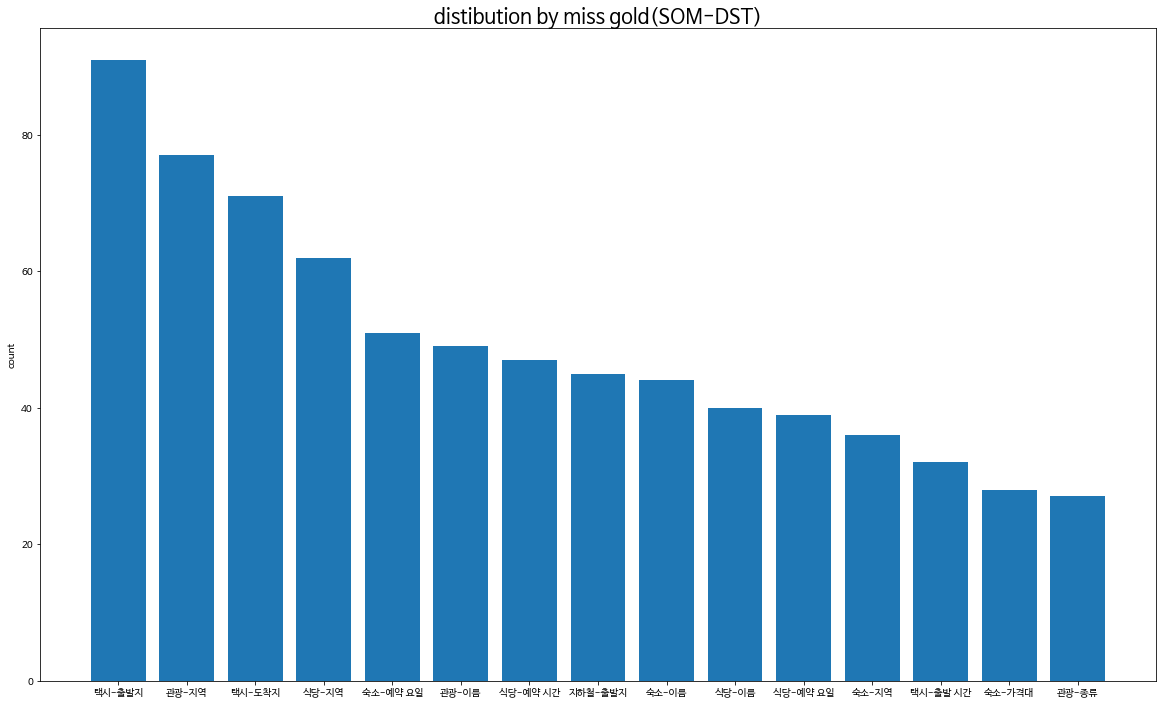

In [233]:

slot_count = Counter([e[0].rsplit('-', 1)[0] for e in total['miss_gold']]).most_common(15)

# 시각화
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(20, 12))  # size설정
xtick_label_position = list(range(len([e[0] for e in slot_count])))  # x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, list([e[0] for e in slot_count]))  # x축 눈금 라벨 출력

plt.bar(xtick_label_position, [e[1] for e in slot_count])  # 바차트 출력

plt.title('distibution by miss gold(SOM-DST)', fontsize=20)  # 타이틀 출력
# plt.xlabel('epoch')  # x축 라벨 출력
plt.ylabel('count')  # y축 라벨 출력
plt.show()

### 지역, 요일 등의 카테고리컬 slot도 오측이 많음

In [171]:
Counter([e[0].rsplit('-', 1)[1] for e in total['miss_gold']]).most_common(10)

[('dontcare', 81),
 ('서울 남쪽', 57),
 ('월요일', 39),
 ('서울 중앙', 37),
 ('서울 북쪽', 34),
 ('서울 동쪽', 26),
 ('서울중앙성원', 22),
 ('no', 21),
 ('목요일', 19),
 ('화요일', 17)]

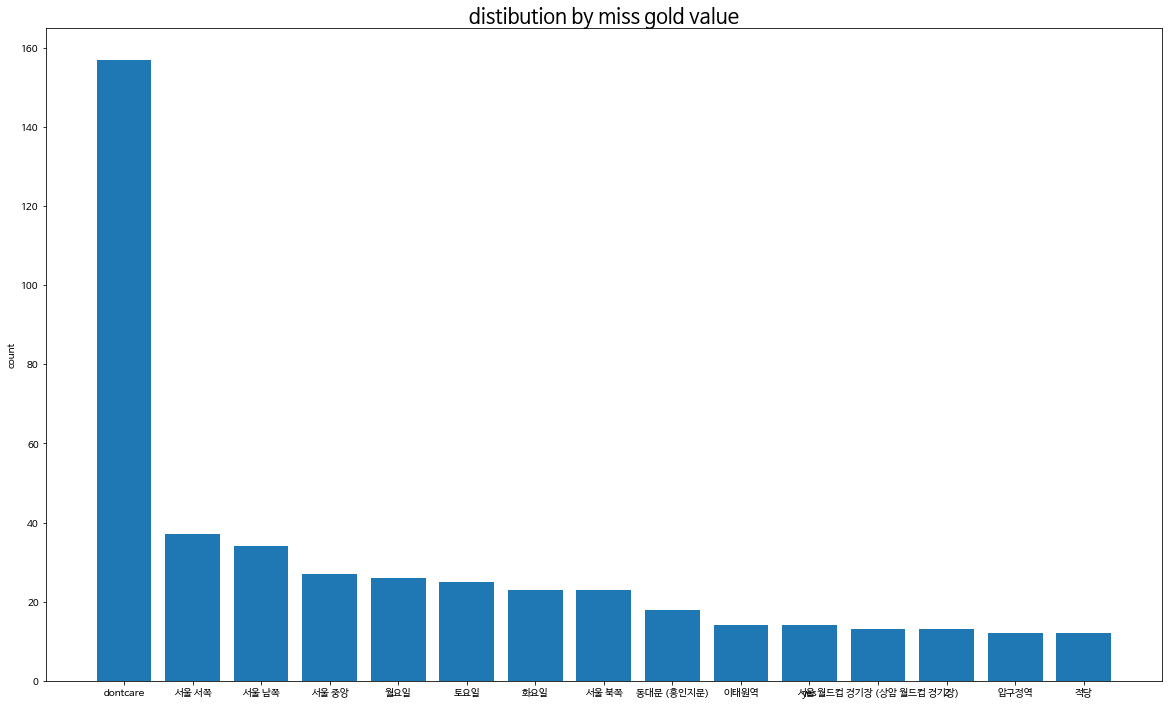

In [304]:
slot_count = Counter([e[1].rsplit('-', 1)[1] for e in total['miss_gold']]).most_common(15)

# 시각화
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(20, 12))  # size설정
xtick_label_position = list(range(len([e[0] for e in slot_count])))  # x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, list([e[0] for e in slot_count]))  # x축 눈금 라벨 출력

plt.bar(xtick_label_position, [e[1] for e in slot_count])  # 바차트 출력

plt.title('distibution by miss gold value', fontsize=20)  # 타이틀 출력
# plt.xlabel('epoch')  # x축 라벨 출력
plt.ylabel('count')  # y축 라벨 출력
plt.show()

## TRADE와 비교

In [227]:
pred_dict_trade = json.load(open('pred_results/TRADE_BERT_gate5_batch4_cosine_annealing_cycle5+.json'))

In [228]:
pred_dict_trade = pred_dict_trade['3']

In [229]:
len(pred_dict_trade)

837

In [230]:
pred_dict_trade[:10]

[{'slot': '식당-예약 시간', 'label': '02:20', 'pred': '03:20'},
 {'slot': '식당-예약 시간', 'label': '02:20', 'pred': '02:50'},
 {'slot': '식당-예약 시간', 'label': '02:20', 'pred': '02:50'},
 {'slot': '관광-지역', 'label': '서울 중앙', 'pred': '서울 남쪽'},
 {'slot': '관광-지역', 'label': '서울 중앙', 'pred': '서울 남쪽'},
 {'slot': '관광-지역', 'label': '서울 중앙', 'pred': 'dont'},
 {'slot': '관광-지역', 'label': '서울 중앙', 'pred': '서울 남쪽'},
 {'slot': '관광-지역', 'label': '서울 중앙', 'pred': '서울 남쪽'},
 {'slot': '관광-지역', 'label': '서울 중앙', 'pred': '서울 남쪽'},
 {'slot': '관광-지역', 'label': '서울 중앙', 'pred': '서울 남쪽'}]

In [231]:
Counter([e['slot'] for e in pred_dict_trade])

Counter({'식당-예약 시간': 79,
         '관광-지역': 53,
         '지하철-출발지': 15,
         '지하철-도착지': 4,
         '택시-도착지': 27,
         '숙소-예약 요일': 42,
         '택시-출발 시간': 19,
         '식당-지역': 57,
         '택시-도착 시간': 17,
         '숙소-이름': 40,
         '숙소-종류': 22,
         '식당-흡연 가능': 8,
         '숙소-지역': 37,
         '식당-예약 명수': 10,
         '식당-종류': 13,
         '식당-이름': 89,
         '관광-이름': 102,
         '관광-종류': 29,
         '택시-종류': 1,
         '숙소-가격대': 56,
         '숙소-예약 명수': 15,
         '택시-출발지': 35,
         '식당-가격대': 13,
         '식당-예약 요일': 23,
         '숙소-예약 기간': 12,
         '숙소-흡연 가능': 3,
         '숙소-인터넷 가능': 1,
         '숙소-주차 가능': 8,
         '숙소-조식 가능': 7})

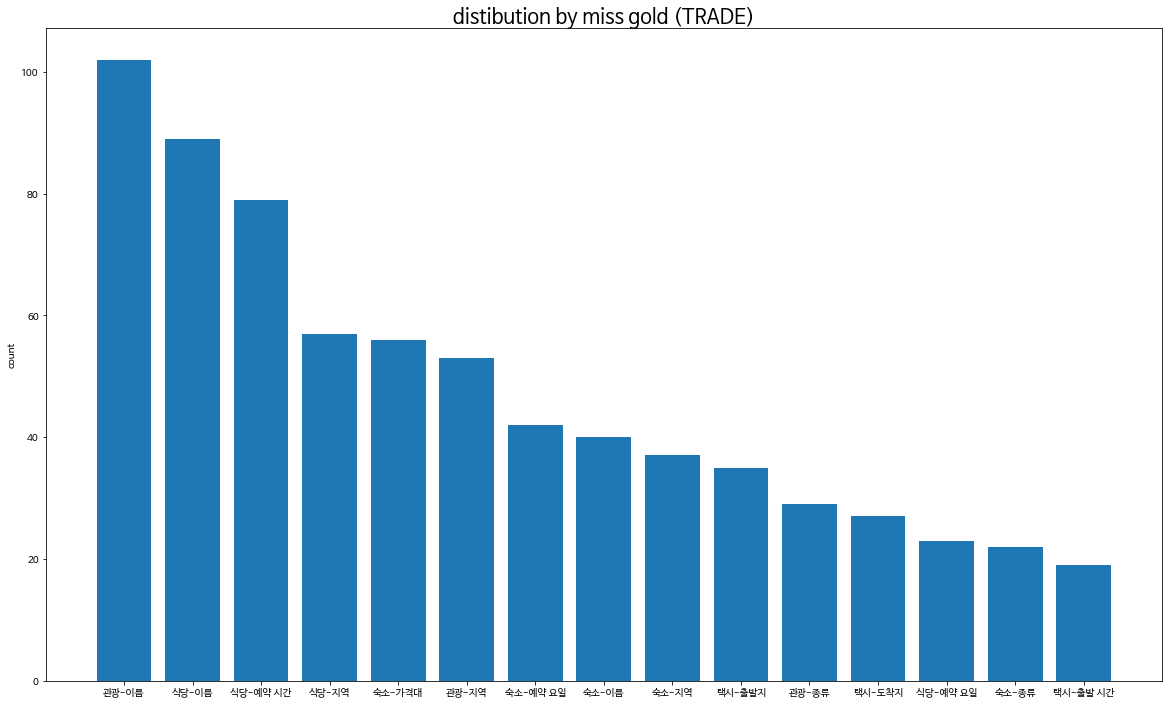

In [232]:
slot_count = Counter([e['slot'] for e in pred_dict_trade]).most_common(15)

# 시각화
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(20, 12))  # size설정
xtick_label_position = list(range(len([e[0] for e in slot_count])))  # x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, list([e[0] for e in slot_count]))  # x축 눈금 라벨 출력

plt.bar(xtick_label_position, [e[1] for e in slot_count])  # 바차트 출력

plt.title('distibution by miss gold (TRADE)', fontsize=20)  # 타이틀 출력
# plt.xlabel('epoch')  # x축 라벨 출력
plt.ylabel('count')  # y축 라벨 출력
plt.show()

- trade 보다는 sumbt와 비교해봐야 할듯

In [216]:
pred_dict_sumbt = json.load(open('pred_results/SUMBT_baseline_miss_labels.json'))

In [221]:
pred_dict_sumbt = pred_dict_sumbt['21']

In [225]:
pred_dict_sumbt[:10]

[{'slot': '관광-지역', 'label': '서울 북쪽', 'pred': '서울 중앙'},
 {'slot': '관광-지역', 'label': '서울 북쪽', 'pred': '서울 중앙'},
 {'slot': '관광-지역', 'label': '서울 북쪽', 'pred': '서울 중앙'},
 {'slot': '관광-지역', 'label': '서울 북쪽', 'pred': '서울 중앙'},
 {'slot': '관광-지역', 'label': '서울 북쪽', 'pred': '서울 중앙'},
 {'slot': '관광-지역', 'label': '서울 북쪽', 'pred': '서울 중앙'},
 {'slot': '숙소-예약 요일', 'label': '화요일', 'pred': '일요일'},
 {'slot': '숙소-예약 요일', 'label': '화요일', 'pred': '일요일'},
 {'slot': '숙소-예약 요일', 'label': '화요일', 'pred': '일요일'},
 {'slot': '숙소-예약 요일', 'label': '화요일', 'pred': '일요일'}]

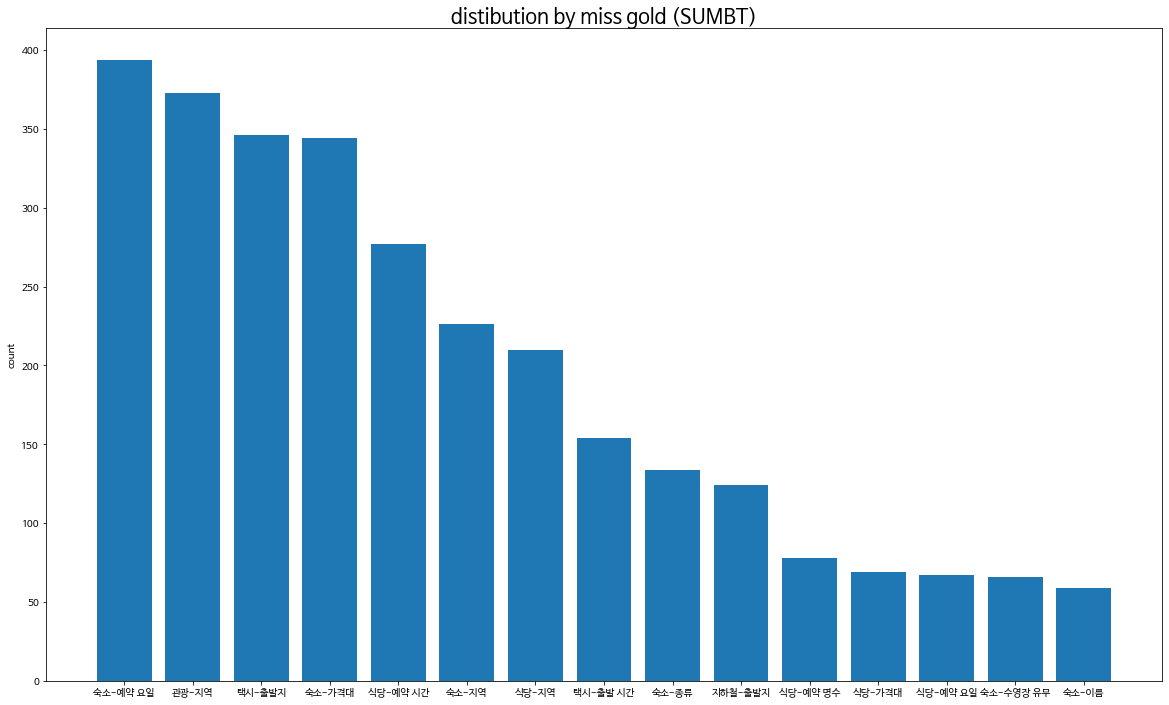

In [224]:
slot_count = Counter([e['slot'] for e in pred_dict_sumbt]).most_common(15)

# 시각화
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(20, 12))  # size설정
xtick_label_position = list(range(len([e[0] for e in slot_count])))  # x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, list([e[0] for e in slot_count]))  # x축 눈금 라벨 출력

plt.bar(xtick_label_position, [e[1] for e in slot_count])  # 바차트 출력

plt.title('distibution by miss gold (SUMBT)', fontsize=20)  # 타이틀 출력
# plt.xlabel('epoch')  # x축 라벨 출력
plt.ylabel('count')  # y축 라벨 출력
plt.show()

### 세 모델간 비교

In [305]:
som = total['miss_gold']
trade = pred_dict_trade
sumbt = pred_dict_sumbt

In [306]:
som = dict(Counter([e[0].rsplit('-', 1)[0] for e in som]).most_common())
trade =  dict(Counter([e['slot'] for e in trade]).most_common())
sumbt =  dict(Counter([e['slot'] for e in sumbt]).most_common())

In [299]:
def count_slot(slot_name: str, *args):
    for e in args:
        try: 
            print(f'{e[slot_name]}', end=' ')
        except:
            pass
    print()

In [300]:
for slot in som.keys():
    print(f'{slot}: ', end=' ')
    count_slot(slot, som, trade, sumbt)

택시-출발지:  91 35 346 
관광-지역:  77 53 373 
택시-도착지:  71 27 58 
식당-지역:  62 57 210 
숙소-예약 요일:  51 42 394 
관광-이름:  49 102 51 
식당-예약 시간:  47 79 277 
지하철-출발지:  45 15 124 
숙소-이름:  44 40 59 
식당-이름:  40 89 28 
식당-예약 요일:  39 23 67 
숙소-지역:  36 37 226 
택시-출발 시간:  32 19 154 
숙소-가격대:  28 56 344 
관광-종류:  27 29 38 
식당-종류:  25 13 36 
택시-도착 시간:  18 17 42 
지하철-도착지:  15 4 9 
숙소-종류:  14 22 134 
식당-예약 명수:  8 10 78 
숙소-헬스장 유무:  7 
숙소-흡연 가능:  7 3 
식당-흡연 가능:  7 8 30 
숙소-주차 가능:  6 8 48 
택시-종류:  5 1 18 
숙소-예약 명수:  5 15 33 
숙소-예약 기간:  4 12 56 


In [301]:
for slot in trade.keys():
    print(f'{slot}: ', end=' ')
    count_slot(slot, som, trade, sumbt)

관광-이름:  49 102 51 
식당-이름:  40 89 28 
식당-예약 시간:  47 79 277 
식당-지역:  62 57 210 
숙소-가격대:  28 56 344 
관광-지역:  77 53 373 
숙소-예약 요일:  51 42 394 
숙소-이름:  44 40 59 
숙소-지역:  36 37 226 
택시-출발지:  91 35 346 
관광-종류:  27 29 38 
택시-도착지:  71 27 58 
식당-예약 요일:  39 23 67 
숙소-종류:  14 22 134 
택시-출발 시간:  32 19 154 
택시-도착 시간:  18 17 42 
지하철-출발지:  45 15 124 
숙소-예약 명수:  5 15 33 
식당-종류:  25 13 36 
식당-가격대:  13 69 
숙소-예약 기간:  4 12 56 
식당-예약 명수:  8 10 78 
식당-흡연 가능:  7 8 30 
숙소-주차 가능:  6 8 48 
숙소-조식 가능:  7 
지하철-도착지:  15 4 9 
숙소-흡연 가능:  7 3 
택시-종류:  5 1 18 
숙소-인터넷 가능:  1 42 


[('택시-출발지', 91),
 ('관광-지역', 77),
 ('택시-도착지', 71),
 ('식당-지역', 62),
 ('숙소-예약 요일', 51),
 ('관광-이름', 49),
 ('식당-예약 시간', 47),
 ('지하철-출발지', 45),
 ('숙소-이름', 44),
 ('식당-이름', 40),
 ('식당-예약 요일', 39),
 ('숙소-지역', 36),
 ('택시-출발 시간', 32),
 ('숙소-가격대', 28),
 ('관광-종류', 27),
 ('식당-종류', 25),
 ('택시-도착 시간', 18),
 ('지하철-도착지', 15),
 ('숙소-종류', 14),
 ('식당-예약 명수', 8),
 ('숙소-헬스장 유무', 7),
 ('숙소-흡연 가능', 7),
 ('식당-흡연 가능', 7),
 ('숙소-주차 가능', 6),
 ('택시-종류', 5),
 ('숙소-예약 명수', 5),
 ('숙소-예약 기간', 4)]

In [29]:
pred = json.load(open('preds_29.json'))

predictions = {}
for k, v in pred.items():
    predictions[k] = v[0]


# json.dump(
#         predictions,
# #         open(f"{args.output_dir}/predictions.csv", "w"),
#         open(f"predictions.csv", "w"),
#         indent=2,
#         ensure_ascii=False,
#     )

{'square-silence-9151:숙소_관광_11_0': ['숙소-가격대-적당', '숙소-스파 유무-yes', '숙소-종류-호텔'],
 'square-silence-9151:숙소_관광_11_1': ['숙소-가격대-적당',
  '숙소-스파 유무-yes',
  '숙소-종류-호텔',
  '숙소-지역-dontcare'],
 'square-silence-9151:숙소_관광_11_2': ['숙소-가격대-적당',
  '숙소-스파 유무-yes',
  '숙소-예약 기간-2',
  '숙소-예약 명수-4',
  '숙소-예약 요일-화요일',
  '숙소-이름-행복 호텔',
  '숙소-종류-호텔',
  '숙소-지역-dontcare'],
 'square-silence-9151:숙소_관광_11_3': ['숙소-가격대-적당',
  '숙소-스파 유무-yes',
  '숙소-예약 기간-2',
  '숙소-예약 명수-4',
  '숙소-예약 요일-화요일',
  '숙소-이름-행복 호텔',
  '숙소-종류-호텔',
  '숙소-지역-dontcare'],
 'square-silence-9151:숙소_관광_11_4': ['관광-지역-서울 동쪽',
  '숙소-가격대-적당',
  '숙소-스파 유무-yes',
  '숙소-예약 기간-2',
  '숙소-예약 명수-4',
  '숙소-예약 요일-화요일',
  '숙소-이름-행복 호텔',
  '숙소-종류-호텔',
  '숙소-지역-dontcare'],
 'square-silence-9151:숙소_관광_11_5': ['관광-종류-dontcare',
  '관광-지역-서울 동쪽',
  '숙소-가격대-적당',
  '숙소-스파 유무-yes',
  '숙소-예약 기간-2',
  '숙소-예약 명수-4',
  '숙소-예약 요일-화요일',
  '숙소-이름-행복 호텔',
  '숙소-종류-호텔',
  '숙소-지역-dontcare'],
 'square-silence-9151:숙소_관광_11_6': ['관광-이름-롯데월드 아쿠아리움',
  '관광-종류-dontcare',
  '관광-지역-서울 동쪽

In [47]:
# tmp = {}
# for k, v in predictions.items():
#     a = ''.join(k.rsplit('_', 1)[:-1])+'-'+ ''.join(k.rsplit('_', 1)[-1])
#     tmp[a]=v

# tmp
# json.dump(
#         tmp,
# #         open(f"{args.output_dir}/predictions.csv", "w"),
#         open(f"predictions.csv", "w"),
#         indent=2,
#         ensure_ascii=False,
#     )



14771
14771


In [ ]:
pred_dict27 = json.load(open('preds_27.json'))

In [7]:
with open('./raw_data/dev_data_raw', 'rb') as f:
    dev_data_raw = pickle.load(f)

In [27]:
print(dev_data_raw[8].dialog_history)
print(dev_data_raw[8].last_dialog_state)
print(dev_data_raw[8].op_labels)
print()
print(dev_data_raw[8].gold_state)
print(dev_data_raw[8].gold_p_state)
print()
print(dev_data_raw[9].dialog_history)
print(dev_data_raw[9].turn_utter)
print(dev_data_raw[9].last_dialog_state)
print(dev_data_raw[9].op_labels)
print()
print(dev_data_raw[9].gold_state)
print(dev_data_raw[9].gold_p_state)

['예약', '##되', '##었', '##습', '##니다', '.', '예약', '번호', '##는', 'DA', '##P', '##K', '##7', '##입니다', '.', ';', '주소', '##도', '알려', '##주', '##시', '##겠', '##어요', '?']
{'관광-종류': '공원', '관광-지역': 'dontcare', '관광-이름': '서울로7017', '식당-가격대': 'dontcare', '식당-지역': 'dontcare', '식당-종류': '양식당', '식당-인터넷 가능': 'yes', '식당-예약 요일': '수요일', '식당-예약 시간': '12:30', '식당-예약 명수': '3', '식당-이름': '내맘속의나폴리'}
['carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover', 'carryover']

['관광-종류-공원', '관광-지역-dontcare', '관광-이름-서울로

In [57]:
train_dial = json.load(open('data/train_dials.json'))
dev_dial = json.load(open('data/dev_dials.json'))

In [31]:
for dic in train_dial:
    if 'wild-mountain-2371'in dic['dialogue_idx']:
        print(dic)

{'dialogue_idx': 'wild-mountain-2371:숙소_관광_식당_15', 'domains': ['숙소', '관광', '식당'], 'dialogue': [{'system_transcript': '', 'turn_idx': 0, 'belief_state': [{'slots': [['숙소-예약 요일', '토요일']], 'act': 'inform'}, {'slots': [['숙소-예약 명수', '4']], 'act': 'inform'}, {'slots': [['숙소-예약 기간', '2']], 'act': 'inform'}, {'slots': [['숙소-이름', '프리미어 호텔']], 'act': 'inform'}], 'turn_label': [['숙소-예약 요일', '토요일'], ['숙소-예약 명수', '4'], ['숙소-예약 기간', '2'], ['숙소-이름', '프리미어 호텔']], 'transcript': '안녕하세요? 숙박 쿠폰이 있는데 프리미어 호텔로 토요일부터 2일 동안 4명 이용으로 예약이 가능한지 알아봐 주시겠어요?', 'system_acts': [], 'domain': '숙소'}, {'system_transcript': '네 안녕하세요? 고객님이 요청하신 일정으로 프리미어 호텔 쿠폰으로 예약이 가능합니다. 바로 예약 진행해 드릴까요?', 'turn_idx': 1, 'belief_state': [{'slots': [['숙소-예약 요일', '토요일']], 'act': 'inform'}, {'slots': [['숙소-예약 명수', '4']], 'act': 'inform'}, {'slots': [['숙소-예약 기간', '2']], 'act': 'inform'}, {'slots': [['숙소-이름', '프리미어 호텔']], 'act': 'inform'}], 'turn_label': [], 'transcript': '네 예약해 주세요. 그리고 조식 제공 여부하고 스파가 있는지도 알려 주세요.', 'system_acts': [], 'domain'

In [36]:
for dic in train_dial:
    for t in dic['dialogue']:
        for e in t['turn_label']:
            if '프리미어' in e[1]:
                pprint.pprint(dic, indent=2)

{ 'dialogue': [ { 'belief_state': [ { 'act': 'inform',
                                      'slots': [['숙소-이름', '프리미어 호텔']]}],
                  'domain': '숙소',
                  'system_acts': [],
                  'system_transcript': '',
                  'transcript': '안녕하세요. 프리미어 호텔에서 숙박을 하고 싶은데요.',
                  'turn_idx': 0,
                  'turn_label': [['숙소-이름', '프리미어 호텔']]},
                { 'belief_state': [ { 'act': 'inform',
                                      'slots': [['숙소-예약 요일', '월요일']]},
                                    { 'act': 'inform',
                                      'slots': [['숙소-예약 명수', '2']]},
                                    { 'act': 'inform',
                                      'slots': [['숙소-예약 기간', '1']]},
                                    { 'act': 'inform',
                                      'slots': [['숙소-이름', '프리미어 호텔']]}],
                  'domain': '숙소',
                  'system_acts': [],
                  'system_tran

In [43]:
preds = json.load(open('pred_results/SOM-DST_epoch30_batch16_encle3e5/preds_59.json'))

In [80]:
for dic in dev_dial:
    if 'mute-wind-9145'in dic['dialogue_idx']:
        pprint.pprint(dic, indent=2)

{ 'dialogue': [ { 'belief_state': [],
                  'domain': '',
                  'system_acts': [],
                  'system_transcript': '',
                  'transcript': '안녕하세요ㅣ.',
                  'turn_idx': 0,
                  'turn_label': []},
                { 'belief_state': [ { 'act': 'inform',
                                      'slots': [['식당-가격대', '적당']]},
                                    { 'act': 'inform',
                                      'slots': [['식당-지역', '서울 동쪽']]},
                                    { 'act': 'inform',
                                      'slots': [['식당-종류', '일식당']]}],
                  'domain': '식당',
                  'system_acts': [],
                  'system_transcript': '안녕하세요. 무엇을 도와드릴까요?',
                  'transcript': '서울 동쪽에 있는 적당한 가격대의 일식당이 어디있나요?',
                  'turn_idx': 1,
                  'turn_label': [ ['식당-가격대', '적당'],
                                  ['식당-지역', '서울 동쪽'],
                            

In [78]:
for k, v in preds.items():
    for e in v[0]:
        if '프리미어' in e:
            print((k, v))


('plain-lake-4179:관광_숙소_택시_9-5', [['관광-문화 예술-yes', '관광-이름-명동난타극장', '관광-종류-dontcare', '관광-지역-서울 중앙', '숙소-가격대-비싼', '숙소-예약 기간-1', '숙소-예약 명수-1', '숙소-예약 요일-일요일', '숙소-이름-프리미어 호텔', '숙소-종류-dontcare', '숙소-지역-서울 중앙'], ['관광-문화 예술-yes', '관광-이름-명동난타극장', '관광-종류-dontcare', '관광-지역-서울 중앙', '숙소-가격대-비싼', '숙소-예약 기간-1', '숙소-예약 명수-1', '숙소-예약 요일-일요일', '숙소-이름-프리미어 호텔', '숙소-종류-dontcare', '숙소-지역-서울 중앙']])
('plain-lake-4179:관광_숙소_택시_9-6', [['관광-문화 예술-yes', '관광-이름-명동난타극장', '관광-종류-dontcare', '관광-지역-서울 중앙', '숙소-가격대-비싼', '숙소-예약 기간-1', '숙소-예약 명수-1', '숙소-예약 요일-일요일', '숙소-이름-프리미어 호텔', '숙소-종류-dontcare', '숙소-지역-서울 중앙', '택시-도착 시간-10:20', '택시-출발 시간-10:20', '택시-출발지-심미 호스텔'], ['관광-문화 예술-yes', '관광-이름-명동난타극장', '관광-종류-dontcare', '관광-지역-서울 중앙', '숙소-가격대-비싼', '숙소-예약 기간-1', '숙소-예약 명수-1', '숙소-예약 요일-일요일', '숙소-이름-프리미어 호텔', '숙소-종류-dontcare', '숙소-지역-서울 중앙', '택시-출발 시간-10:20', '택시-출발지-심미 호스텔']])
('plain-lake-4179:관광_숙소_택시_9-7', [['관광-문화 예술-yes', '관광-이름-명동난타극장', '관광-종류-dontcare', '관광-지역-서울 중앙', '숙소-가격대-비싼', '숙소-예약 기간-1', '숙소-예약 명수-1', '숙소-예

In [71]:
for k, v in preds.items():
    if 'shiny-wood' in k:
        pprint.pprint((k, v))

('shiny-wood-6096:식당_숙소_10-0',
 [['식당-가격대-저렴', '식당-종류-한식당'], ['식당-가격대-저렴', '식당-종류-한식당']])
('shiny-wood-6096:식당_숙소_10-1',
 [['식당-가격대-저렴', '식당-종류-한식당', '식당-지역-dontcare', '식당-흡연 가능-yes'],
  ['식당-가격대-저렴', '식당-종류-한식당', '식당-지역-dontcare', '식당-흡연 가능-yes']])
('shiny-wood-6096:식당_숙소_10-2',
 [['식당-가격대-저렴',
   '식당-예약 명수-5',
   '식당-예약 시간-06:15',
   '식당-예약 요일-목요일',
   '식당-이름-만칠천무한리필',
   '식당-종류-한식당',
   '식당-지역-dontcare',
   '식당-흡연 가능-yes'],
  ['식당-가격대-저렴',
   '식당-예약 명수-5',
   '식당-예약 시간-06:15',
   '식당-예약 요일-목요일',
   '식당-이름-만칠천무한리필',
   '식당-종류-한식당',
   '식당-지역-dontcare',
   '식당-흡연 가능-yes']])
('shiny-wood-6096:식당_숙소_10-3',
 [['식당-가격대-저렴',
   '식당-예약 명수-5',
   '식당-예약 시간-06:15',
   '식당-예약 요일-목요일',
   '식당-이름-만칠천무한리필',
   '식당-종류-한식당',
   '식당-주류 판매-yes',
   '식당-지역-dontcare',
   '식당-흡연 가능-yes'],
  ['식당-가격대-저렴',
   '식당-예약 명수-5',
   '식당-예약 시간-06:15',
   '식당-예약 요일-목요일',
   '식당-이름-만칠천무한리필',
   '식당-종류-한식당',
   '식당-지역-dontcare',
   '식당-흡연 가능-yes']])
('shiny-wood-6096:식당_숙소_10-4',
 [['숙소-가격대-dontcare',
   '숙소-종류-dont